# Load data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../MediaSharingIndex/Data/data.csv')  # Load main dataset
data = df.copy()
data.drop_duplicates('url', inplace=True)  # Create dataframe without duplicated news articles links

# Define global interest topics

In [3]:
ntopics = 10
topic_names = ['Politics BA Province', 'Economy/Dolar', 'Justice', 'Politics CL', '3rd Party', 'Wage/Inflation', 'Politics CR', 'Elections', 'Trash topic', 'Gossip & Sport']
topic_interest_global = data[[f'T{i}' for i in range(ntopics)]].mean().to_list()

# Calculate the share ratio

Shared ratio per topic, defined as the mean frequency of article sharing associated with each topic



In [4]:
y = df[[f'T{i}' for i in range(ntopics)]].sum().to_numpy()
norm = data[[f'T{i}' for i in range(ntopics)]].sum().to_numpy()
ratio = y / norm
index_sorted = sorted(range(ntopics), key = lambda x: ratio[x])

# Plot news articles topics

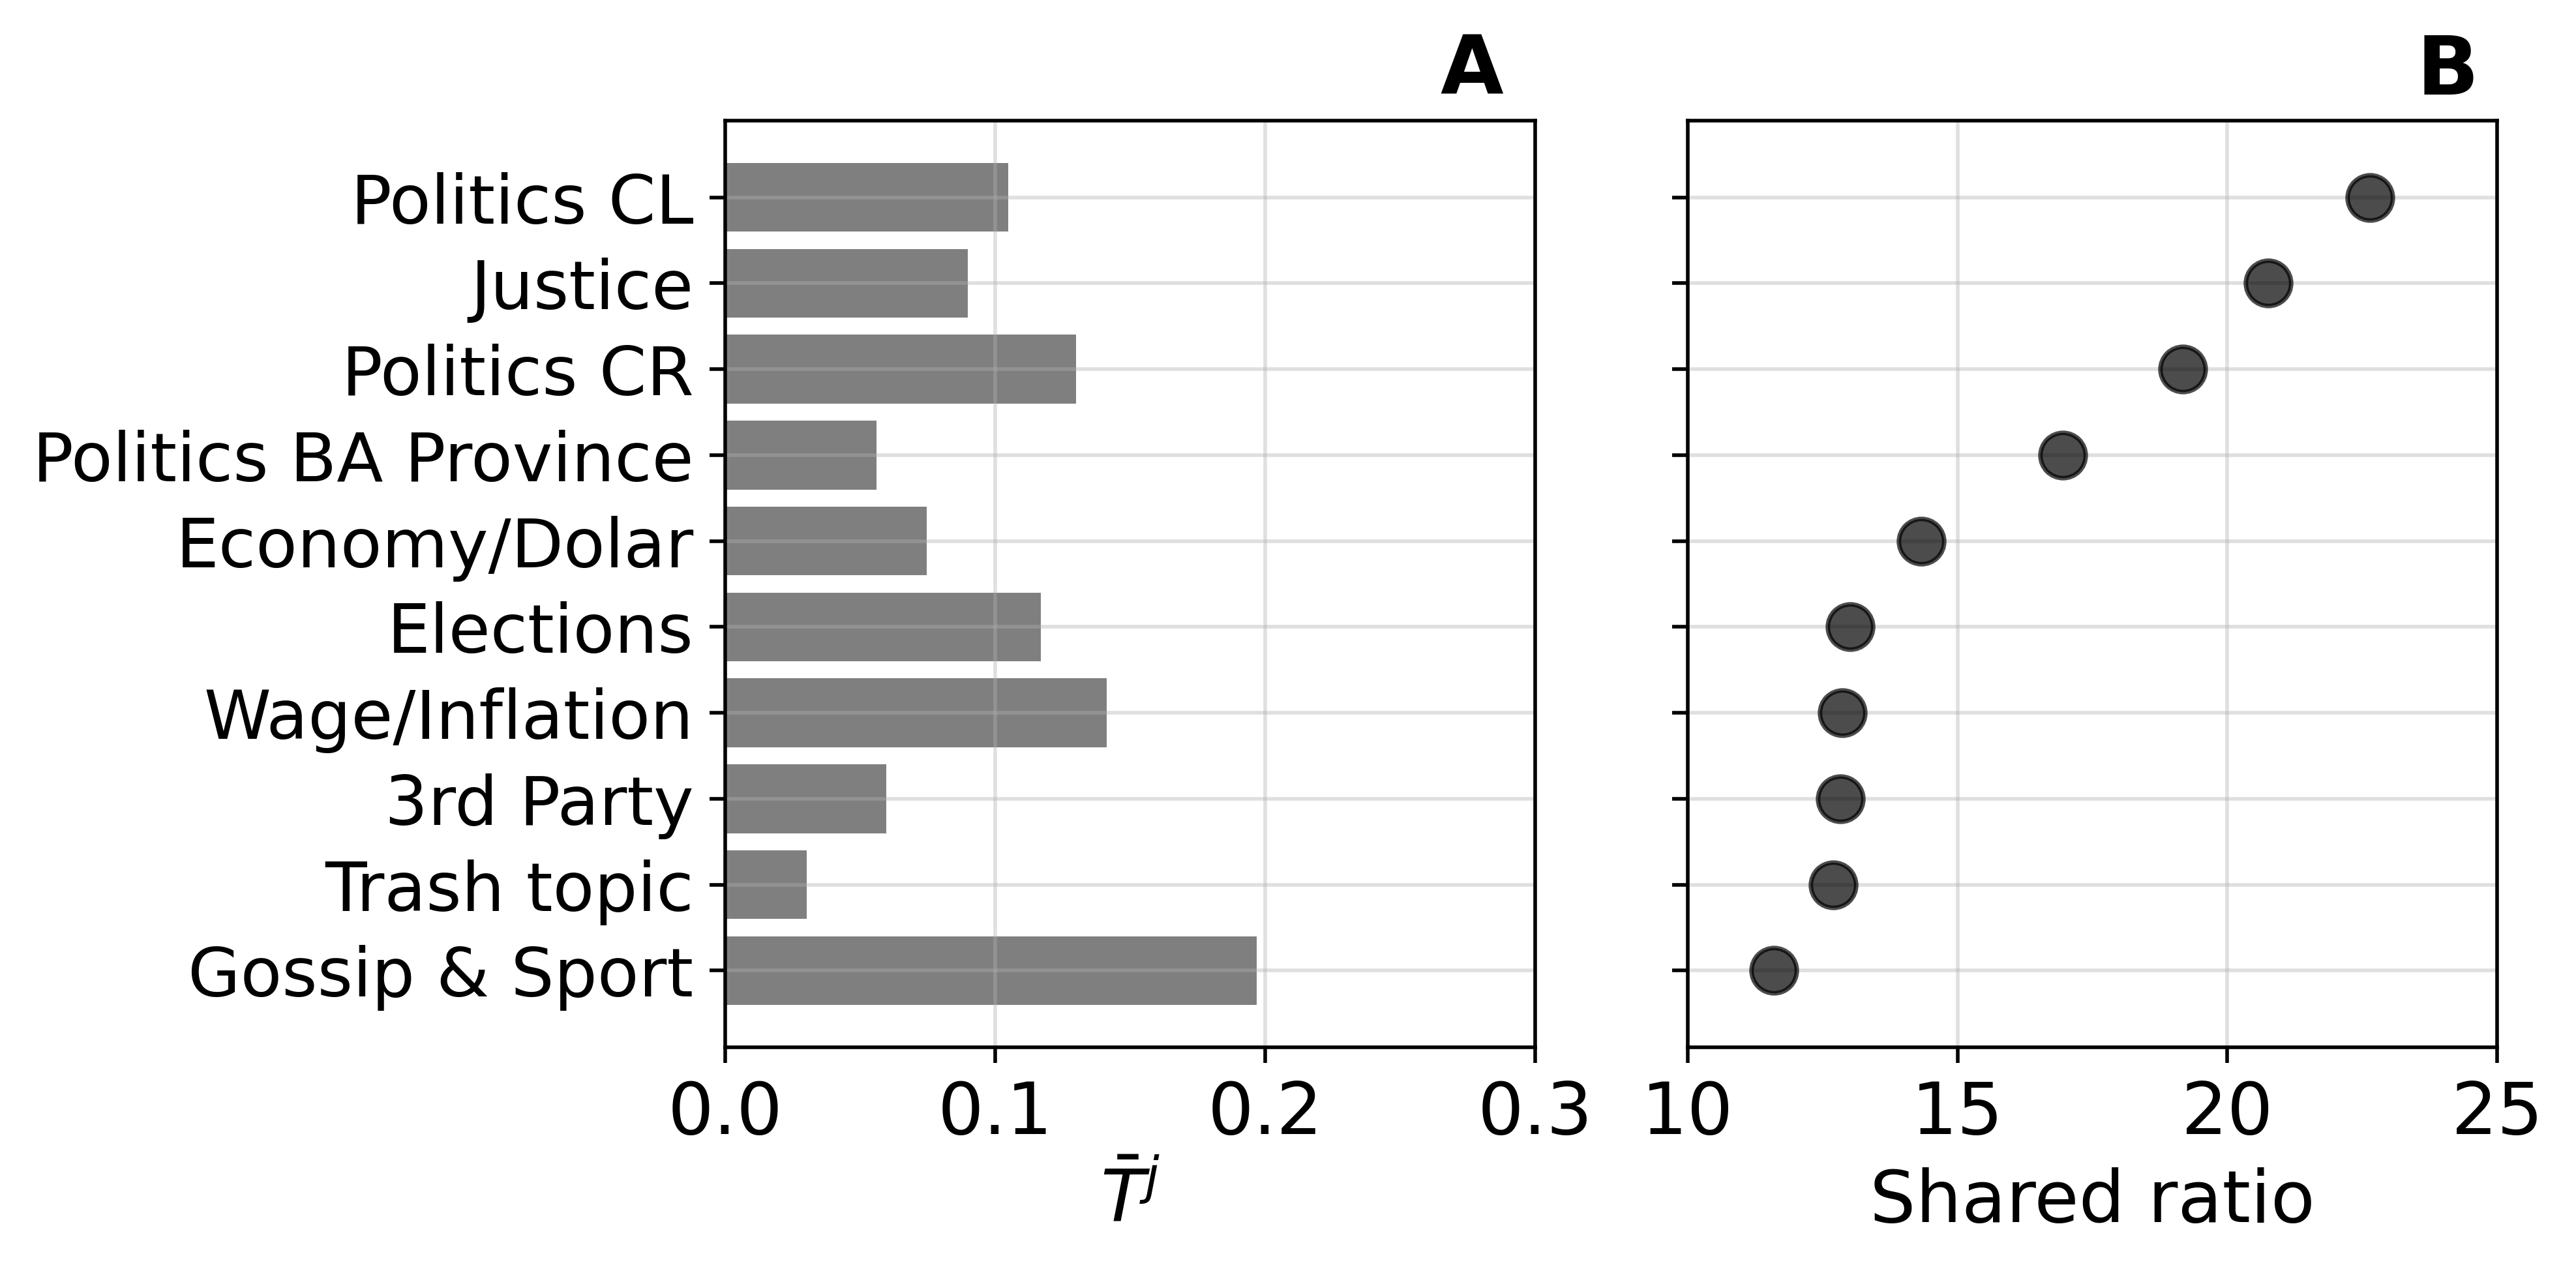

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8, 4),dpi =500)

ax1.barh(range(ntopics), [topic_interest_global[i] for i in index_sorted], alpha=0.50, color='k')
ax1.set_yticks(range(ntopics))
ax1.set_yticklabels([topic_names[i] for i in index_sorted], size=15)
ax1.set_xlabel(r'$\bar{T}^j$', size=16)
ax1.set_xticks([np.round(x,2) for x in np.arange(0.00, 0.32, 0.10)])
ax1.set_xticklabels([np.round(x,2) for x in np.arange(0.00, 0.32, 0.10)], size=16)
ax1.grid(True, alpha=0.4)
ax1.text(0.265,10.2,'A',fontweight = 'bold',fontsize = 18)
ax2.plot([ratio[i] for i in index_sorted], range(ntopics), '.', markersize=20, alpha=0.70, color='k')
#ax2.set_yticks([])
ax2.set_xticks([10, 15, 20, 25])
ax2.set_xticklabels([10, 15, 20, 25], size=16)
ax2.set_xlim([10, 25])
ax2.grid(True, alpha=0.4)
ax2.set_xlabel('Shared ratio', size=16)
ax2.text(23.5,10.2,'B',fontweight = 'bold',fontsize = 18)

plt.subplots_adjust(wspace=0.2)
plt.tight_layout()
#plt.savefig('figura4.pdf')
plt.show()



### Media Agenda

In [19]:
from math import pi

def radar_plot(distribution, topic_names, color, ax, label):
    # Número de variables que tenemos
    num_vars = len(topic_names)

    # Ángulos de cada eje en el radar plot (dividimos el círculo completo por el número de variables)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # El gráfico es circular, así que necesitamos "cerrar" el círculo:
    distribution += distribution[:1]
    angles += angles[:1]

    # Dibujar una línea para cada distribución
    ax.plot(angles, distribution, color=color, linewidth=2, label=label)
    # Rellenar el interior de la distribución
    ax.fill(angles, distribution, color=color, alpha=0.25)

    # Mejorar el gráfico
    ax.set_yticks([0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35])
    ax.set_yticklabels(['', '', 0.10, '', 0.20, '', 0.30, ''], fontsize = 8)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(topic_names, bbox = dict(boxstyle="round", ec="black", fc="white", alpha=1), fontweight = 'bold', color = 'black', alpha = 1.00)
    ax.set_title(label, size = 20, pad = 20, loc = 'center')
    ax.spines['polar'].set_visible(False)


    # Asegurarse de que los ticks de los ejes se distribuyan de manera uniforme y sean legibles
    for label, angle in zip(ax.get_xticklabels(), angles):
        if angle in (0, pi):
            label.set_horizontalalignment('center')
        elif 0 < angle < pi:
            label.set_horizontalalignment('center')
        else:
            label.set_horizontalalignment('center')

In [20]:
topic_names = ['Politics BA Province', 'Economy/Dolar', 'Justice', 'Politics CL', '3rd Party', 'Wage/Inflation', 'Politics CR', 'Elections', 'Trash topic', 'Gossip & Sport']

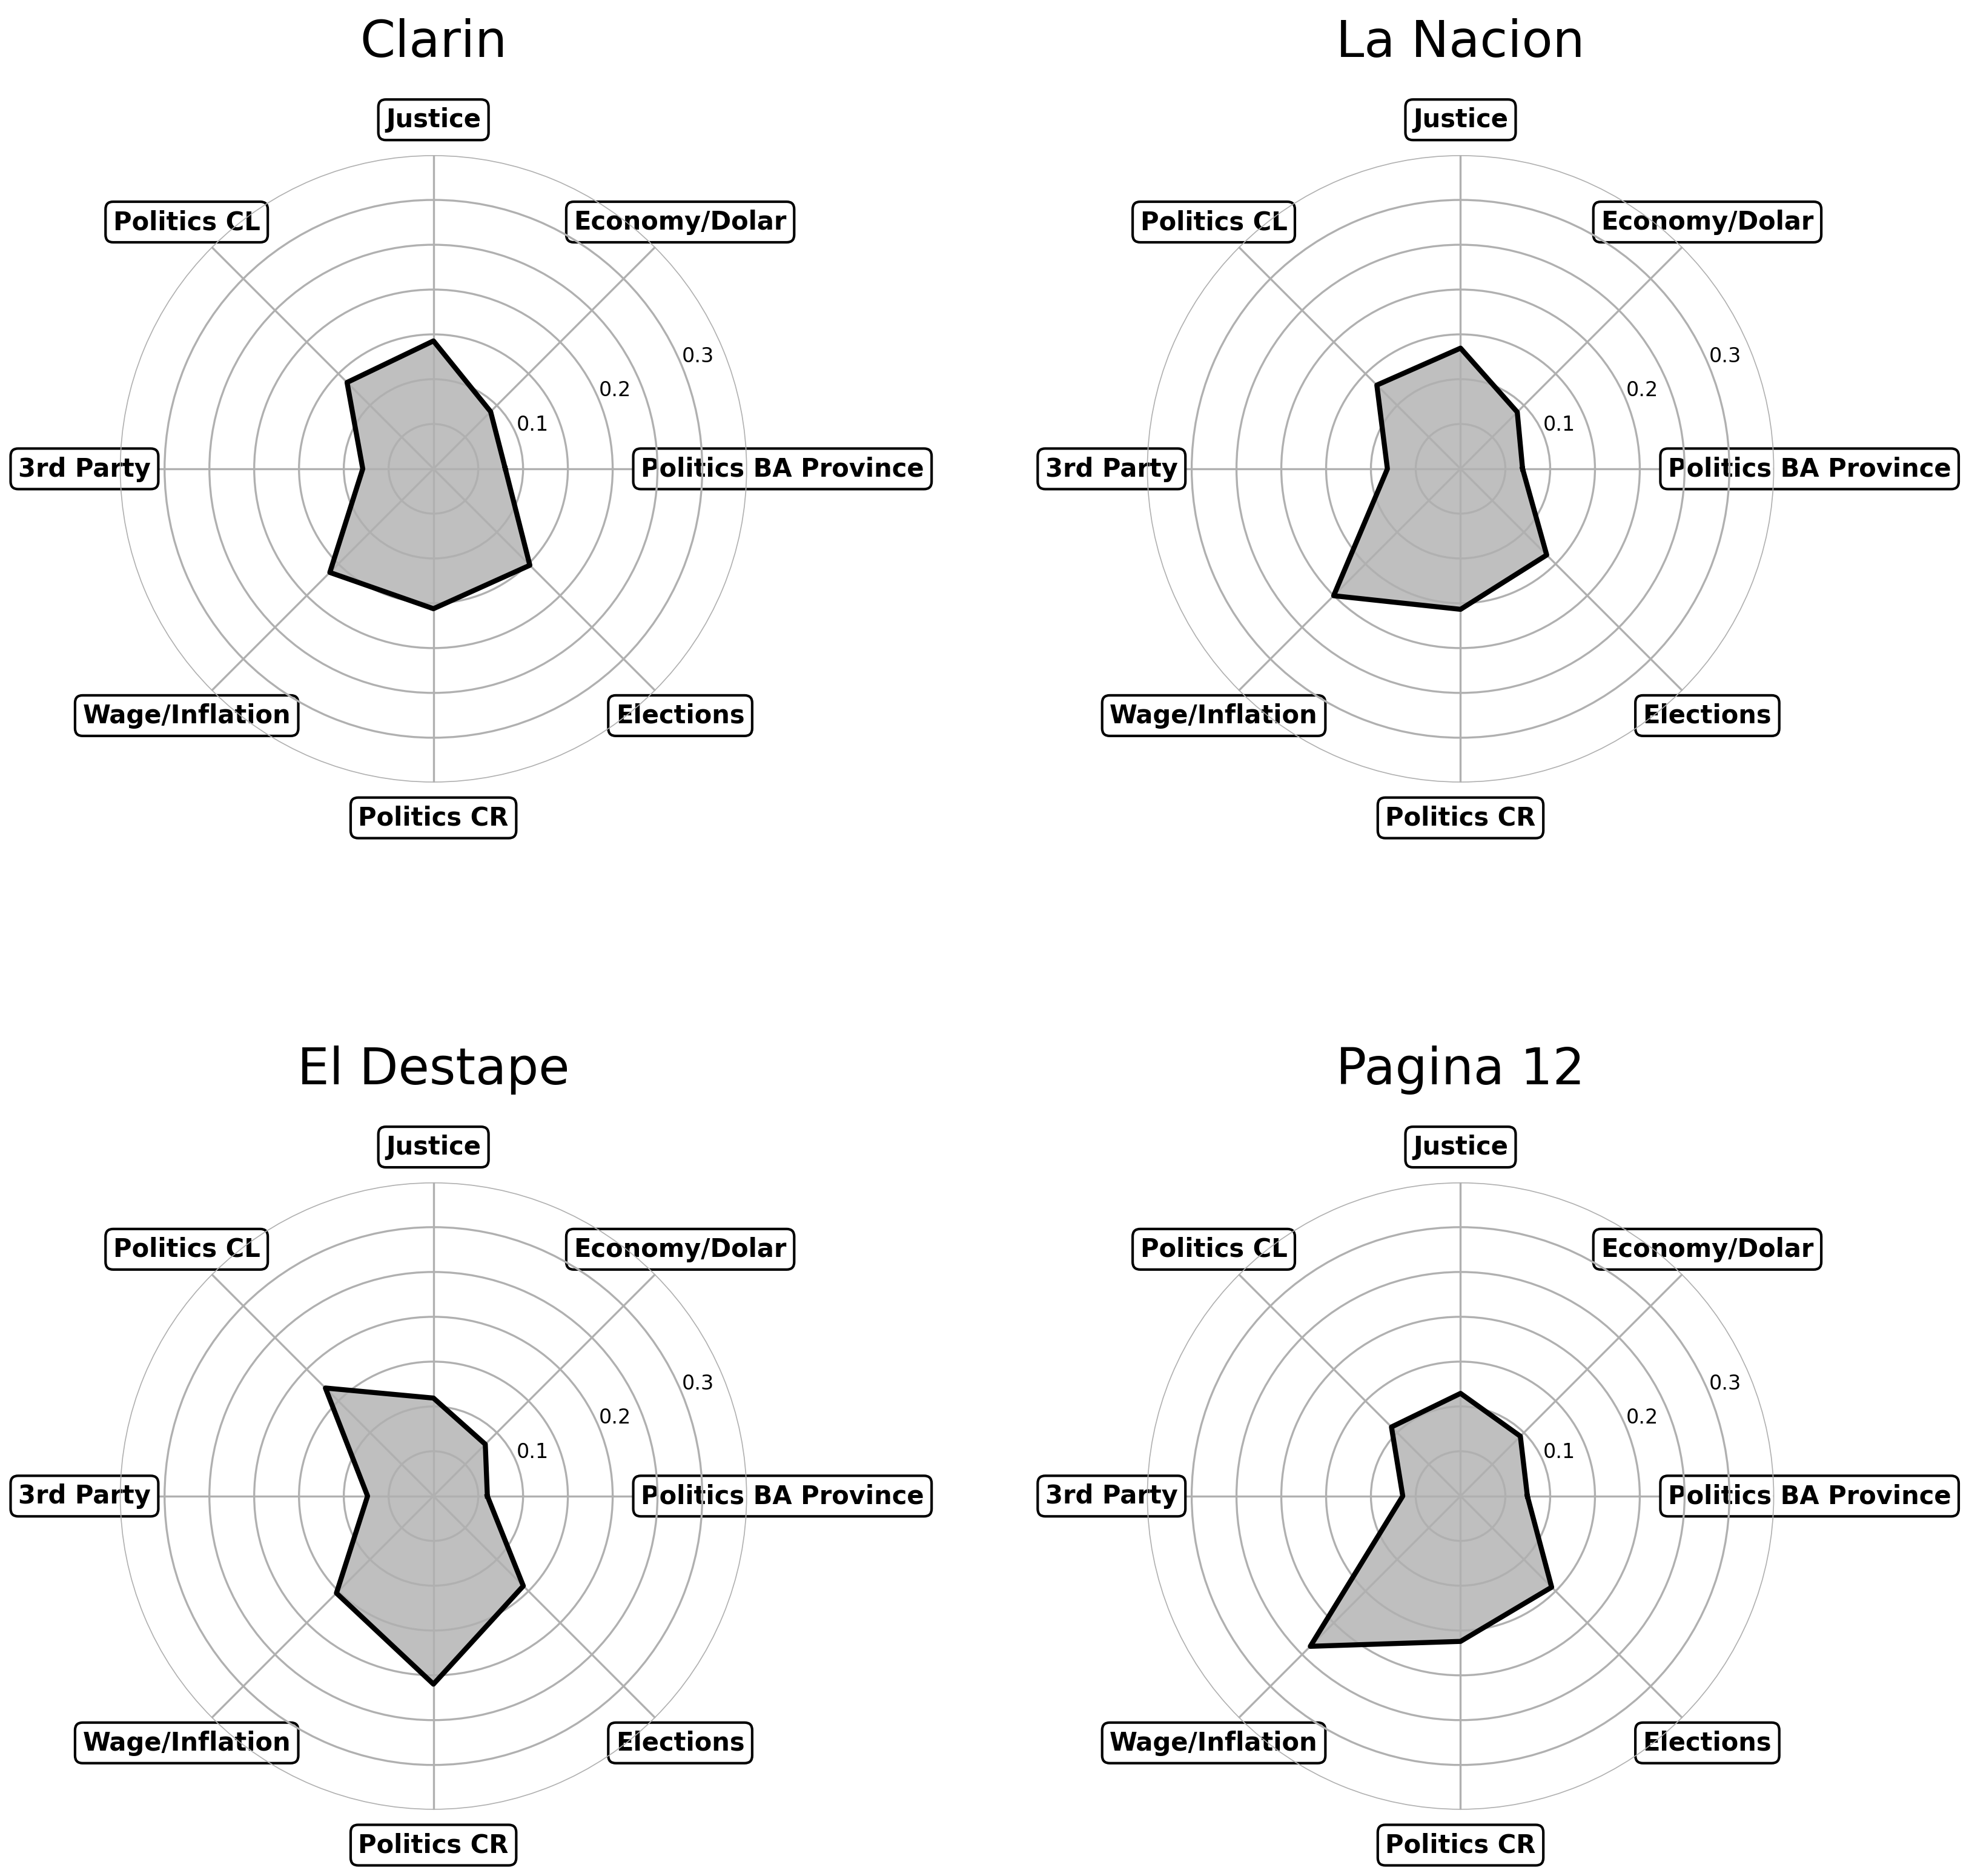

In [21]:
# Uso de la función
# Crear una figura
fig, ax = plt.subplots(figsize=(12, 12), ncols=2, nrows=2, subplot_kw=dict(polar=True), dpi = 300)

coordinates = {'Clarin': [0,0], 'La Nacion': [0, 1], 'El Destape': [1,0], 'Pagina 12': [1, 1]}

for outlet in ['Clarin', 'La Nacion', 'El Destape', 'Pagina 12']:
    
    i, j = coordinates[outlet]
    
    media_agenda = data[data.outlet == outlet][[f'T{k}' for k in range(8)]].mean(axis = 0).to_list()
    media_agenda = list(np.array(media_agenda) / np.sum(media_agenda))
    
    radar_plot(distribution=media_agenda, topic_names=topic_names[:len(media_agenda)], color='black', ax=ax[i,j], label=outlet)

    # Añadir una leyenda
    # ax[i,j].legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.tight_layout(pad = 5)
plt.savefig('New_figure4.pdf')
plt.show()

In [22]:
len(media_agenda)

9